<h1><center>Social Data Science - Project</center></h1>
<h2><center>Road Accidents in Great Britain</center></h2>
*By **Janus, Gautam and Mathias** *

## Import Package

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Import data:
Our data is available at [Great Britian Road Accident Data](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) in which we take the need URLs for each CSV file. 

However, we were unable to unpack a ZIP file containing multiple files for the periode 2005 to 2014. Hence, The needed files are store on our desktop and imported into python.

In [2]:
# url = 'http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip'
# nu = re.findall("[_].+[A-Za-z].+\d",url)
# st1 = ''.join(nu)
# print(st1) 

url = ["http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip","http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",
       "http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip","http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip"]

####Figure out how to download the 05-14 and save it in your memory or get the fucking zip thing to work
vehicles_2016 = pd.read_csv(url[0], compression='zip')
accidents_2016 = pd.read_csv(url[1], compression='zip')
vehicles_2015 = pd.read_csv(url[2], compression='zip')
accidents_2015 = pd.read_csv(url[3], compression='zip')
#Mathias: 
# vehicles_05_14 = pd.read_csv("/Users/jarand/Documents/Stud.Polit/Social Data Science/EXAM/Vehicles0514.csv")
# accidents_05_14 = pd.read_csv("/Users/jarand/Documents/Stud.Polit/Social Data Science/EXAM/Accidents0514.csv")

#Janus:
vehicles_05_14 = pd.read_csv("/Users/jalarsen/Desktop/School/Social Data Science/Exam/Datafile/Vehicles0514.csv")
accidents_05_14 = pd.read_csv("/Users/jalarsen/Desktop/School/Social Data Science/Exam/Datafile/Accidents0514.csv")

C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Filtering and Adjusting the Data:
- Each files contains around 30 columns
- Many columns which are not needed 
- Due to large files, we filter and adjust each file seperately before merging them

In [3]:
# Filtering the columns we need and dropping the rest

vehicles_2016 = vehicles_2016[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_2016 = accidents_2016[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

vehicles_2015 = vehicles_2015[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_2015 = accidents_2015[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

vehicles_05_14 = vehicles_05_14[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_05_14 = accidents_05_14[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

In [4]:
# Removing Sex_of_Driver = -1 & 3 which mean data missing and Not known

vehicles_2016 = vehicles_2016[(vehicles_2016['Sex_of_Driver']==1) | (vehicles_2016['Sex_of_Driver']==2)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Sex_of_Driver']==1) | (vehicles_2015['Sex_of_Driver']==2)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Sex_of_Driver']==1) | (vehicles_05_14['Sex_of_Driver']==2)]

In [5]:
# Removing missing data values from Age_of_Driver

vehicles_2016 = vehicles_2016[(vehicles_2016['Age_of_Driver']!=-1)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Age_of_Driver']!=-1)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Driver']!=-1)]

In [6]:
#Removing missing values from the Age_of_Vehicle

vehicles_2016 = vehicles_2016[(vehicles_2016['Age_of_Vehicle']!=-1)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Age_of_Vehicle']!=-1)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Vehicle']!=-1)]

In [7]:
#Filtering the Vehicle_Type down to Cars and Motorbikes 

vehicles_2016 = vehicles_2016[(vehicles_2016['Vehicle_Type']==2) | (vehicles_2016['Vehicle_Type']==3) | (vehicles_2016['Vehicle_Type']==4) | (vehicles_2016['Vehicle_Type']==5) | (vehicles_2016['Vehicle_Type']==8) | (vehicles_2016['Vehicle_Type']==9) | (vehicles_2016['Vehicle_Type']==22) | (vehicles_2016['Vehicle_Type']==23) | (vehicles_2016['Vehicle_Type']==97)]

vehicles_2015 = vehicles_2015[(vehicles_2015['Vehicle_Type']==2) | (vehicles_2015['Vehicle_Type']==3) | (vehicles_2015['Vehicle_Type']==4) | (vehicles_2015['Vehicle_Type']==5) | (vehicles_2015['Vehicle_Type']==8) | (vehicles_2015['Vehicle_Type']==9) | (vehicles_2015['Vehicle_Type']==22) | (vehicles_2015['Vehicle_Type']==23) | (vehicles_2015['Vehicle_Type']==97)]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Vehicle_Type']==2) | (vehicles_05_14['Vehicle_Type']==3) | (vehicles_05_14['Vehicle_Type']==4) | (vehicles_05_14['Vehicle_Type']==5) | (vehicles_05_14['Vehicle_Type']==8) | (vehicles_05_14['Vehicle_Type']==9) | (vehicles_05_14['Vehicle_Type']==22) | (vehicles_05_14['Vehicle_Type']==23) | (vehicles_05_14['Vehicle_Type']==97)]

In [8]:
# Removing Roads which are not classified

accidents_2016 = accidents_2016[(accidents_2016['1st_Road_Class']!=6)]

accidents_2015 = accidents_2015[(accidents_2015['1st_Road_Class']!=6)]

accidents_05_14 = accidents_05_14[(accidents_05_14['1st_Road_Class']!=6)]

In [9]:
# Filtering Light Conditions (Daylight , Dark with lights lit, Dark with no light)

accidents_2016 = accidents_2016[(accidents_2016['Light_Conditions']==1) | (accidents_2016['Light_Conditions']==4) | (accidents_2016['Light_Conditions']==6)]

accidents_2015 = accidents_2015[(accidents_2015['Light_Conditions']==1) | (accidents_2015['Light_Conditions']==4) | (accidents_2015['Light_Conditions']==6)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Light_Conditions']==1) | (accidents_05_14['Light_Conditions']==4) | (accidents_05_14['Light_Conditions']==6)]

In [10]:
# Sun and Rain

accidents_2016 = accidents_2016[(accidents_2016['Weather_Conditions']==1) | (accidents_2016['Weather_Conditions']==2)]

accidents_2015 = accidents_2015[(accidents_2015['Weather_Conditions']==1) | (accidents_2015['Weather_Conditions']==2)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Weather_Conditions']==1) | (accidents_05_14['Weather_Conditions']==2)]

In [11]:
# Dry and Wet roads

accidents_2016 = accidents_2016[(accidents_2016['Road_Surface_Conditions']==1) | (accidents_2016['Road_Surface_Conditions']==2)]

accidents_2015 = accidents_2015[(accidents_2015['Road_Surface_Conditions']==1) | (accidents_2015['Road_Surface_Conditions']==2)]

accidents_05_14 = accidents_05_14[(accidents_05_14['Road_Surface_Conditions']==1) | (accidents_05_14['Road_Surface_Conditions']==2)]

In [12]:
print(accidents_05_14.shape)
print(accidents_2016.shape)
print(accidents_2015.shape)

(1042177, 10)
(83619, 10)
(88542, 10)


In [13]:
# Turning Accident_Severity into binary i.e 0 for Non-Fatal and 1 for Fatal & Serious Accidents

accidents_2016.Accident_Severity = accidents_2016.Accident_Severity.replace(2,1)
accidents_2016.Accident_Severity = accidents_2016.Accident_Severity.replace(3,0)

accidents_2015.Accident_Severity = accidents_2015.Accident_Severity.replace(2,1)
accidents_2015.Accident_Severity = accidents_2015.Accident_Severity.replace(3,0)

accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(2,1)
accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(3,0)

In [14]:
accidents_2015.columns

Index(['Accident_Index', 'Day_of_Week', 'Time', '1st_Road_Class',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Number_of_Casualties', 'Accident_Severity'],
      dtype='object')

In [15]:
# c.groupby('Road_Surface_Conditions').count() /////// Important stuff


In [65]:
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index

_16 = pd.merge(vehicles_2016,accidents_2016, on='Accident_Index')
print(_16.shape)
_15 = pd.merge(vehicles_2015,accidents_2015, on='Accident_Index')

_05_14 = pd.merge(vehicles_05_14,accidents_05_14, on='Accident_Index')

(98202, 15)


In [66]:
# Merge the three files: 
joined2 = pd.concat([_16, _15], ignore_index=False)
joined = pd.concat([joined2, _05_14], ignore_index=False)

In [67]:
joined.shape
print(joined.head(5))

  Accident_Index  Vehicle_Reference  Sex_of_Driver  Age_of_Driver  \
0  2016010000006                  1              2             36   
1  2016010000008                  1              1             24   
2  2016010000018                  1              1             20   
3  2016010000019                  1              2             30   
4  2016010000019                  2              1             27   

   Age_of_Vehicle  Vehicle_Type  Day_of_Week   Time  1st_Road_Class  \
0               1             9            3  00:37               3   
1               5             9            3  01:25               3   
2              11             9            3  07:53               3   
3              10             9            3  09:29               3   
4               5             9            3  09:29               3   

   Speed_limit  Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0         30.0                 4                   1                        1

In [19]:
# import matplotlib.pyplot as plt
# new = joined[['Sex_of_Driver']]
# new_1 = pd.value_counts(new['Sex_of_Driver'])
# # new_1.plot(kind='bar') Simple pl


# fig, ax = plt.subplots()
# ax.plot(new_1)
# ax.legend(['Sex of the Driver'],loc='upper left',frameon=False)
# ax.set_title('Number of Male and Females involved in Road Accidents')
# ax.set_ylabel('Number of People')
# fig.tight_layout()

In [20]:
# new = new.ix[new['Sex_of_Driver']!=1] Future use

## Descriptive Statistics:
In this section, we create the following descritive plots: 
- Accidents by time of day and day of the week
    - Hour 
    - Day
- Accidents by speed limit
    - All Accidents
    - Serious & Fatal accidents
- Accidents by gender
- Accidents by age 
- Accidents by weather
- Accidents by road conditions
- Accidents by light conditions

### Plot: Accidents by time of day and day of the week:

In [68]:
#Convert the column 'Time' into only containing hours and not the minuts: 
joined['Hour'] = joined['Time'].map(lambda x: str(x).split(':')[0]) #Takes the hour
joined['Hour'] = joined['Hour'].apply(pd.to_numeric, errors='coerce') #invalid parsing will be set as NaN

#Loop to stack the number of accidents sorted by hours:
hour = []
number_of_accidents_hour = []
for i in range(24):
    hour.append(i)
    accidents_per_hour = len(joined[joined['Hour'] == i])
    number_of_accidents_hour.append(accidents_per_hour)
#print(hour)
#print(number_of_accidents_hour)

#Next we are interested in the number of severe accidents per hour relative to the number of accidents per hour. 
#Loop for severe accidents:
severe_accident = []
num_of_fatal_acci = []
for i in range(24):
    severe_accident_hour = len(joined[(joined['Accident_Severity'] == 1) & (joined['Hour'] == i)])
    severe_accident.append(severe_accident_hour)
#print(severe_accident)

#Create the relative percentage: 
percentage_severe_accidents = list(np.array(severe_accident) / np.array(number_of_accidents_hour))
#print(percentage_severe_accidents)

#Next we want to do the same for each day of the week: 

#Then repeat the process for the day of the week:
sunday = len(joined[joined['Day_of_Week']==1])
monday = len(joined[joined['Day_of_Week']==2])
tuesday = len(joined[joined['Day_of_Week']==3])
wednesday = len(joined[joined['Day_of_Week']==4])
thursday = len(joined[joined['Day_of_Week']==5])
friday = len(joined[joined['Day_of_Week']==6])
saturday = len(joined[joined['Day_of_Week']==7])
total_accidents = sunday + monday + tuesday + wednesday + thursday + friday + saturday
day_list = [sunday, monday, tuesday, wednesday, thursday, friday, saturday]

#Creating the percentage:
sunday_pct = sunday / total_accidents
monday_pct = monday / total_accidents
tuesday_pct = tuesday / total_accidents
wednesday_pct = wednesday / total_accidents
thursday_pct = thursday / total_accidents
friday_pct = friday / total_accidents
saturday_pct = saturday / total_accidents

day = []
severe_accidents_day = []
for i in range(1,8):
    day.append(i)
    severe_accidents_day.append(len(joined[(joined['Day_of_Week'] == i) & (joined['Accident_Severity'] == 1)]))
    
percentage_day = list(np.array(severe_accidents_day) / day_list)
# print(percentage_day)

#Defining variables:
x1 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x2 = ['','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #Needed for subplots
y1 = [sunday_pct, monday_pct, tuesday_pct, wednesday_pct, thursday_pct, friday_pct, saturday_pct]
x1_ = list(range(len(x1)))

C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


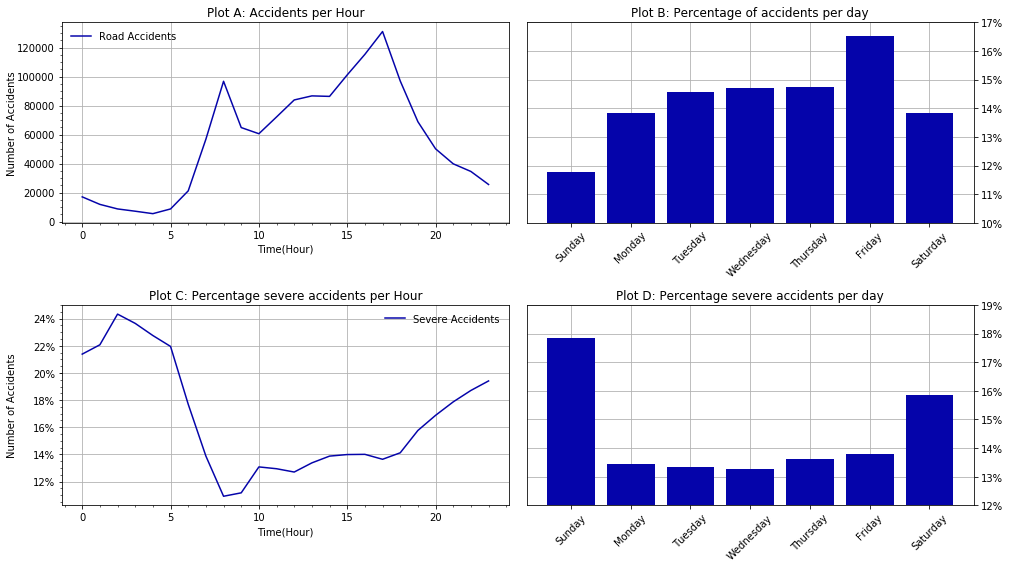

In [22]:
#Create the plot for both figures:
#fig, (ax, ax2, axhour, axday) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig = plt.figure(figsize=(14,8))

#Plot for the hour of day:
ax = fig.add_subplot(221)
ax.plot(hour, number_of_accidents_hour, color='#0504aa')
ax.legend(['Road Accidents'],loc='upper left',frameon=False)
ax.set_title('Plot A: Accidents per Hour')
ax.set_ylabel('Number of Accidents', size = 10)
ax.minorticks_on()
ax.set_xlabel('Time(Hour)')
ax.get_yaxis().set_label_coords(-0.1,0.5)
ax.grid(True)

#Plot fo the day of the week:
ax2 = fig.add_subplot(222)
ax2.bar(x1_, y1, color='#0504aa', zorder=3)
ax2.set_xticklabels(x2, rotation=45)
ax2.set_title("Plot B: Percentage of accidents per day")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.grid(True, zorder=0)
ax2.set_ylim([0.10, 0.17])
vals10 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x1_) for x1_ in vals10]) #edit "1" to "2" if more decimals are needed.
ax1 = fig.add_subplot(221)

axhour = fig.add_subplot(223)
axhour.plot(hour, percentage_severe_accidents, color='#0504aa')
axhour.legend(['Severe Accidents'],loc='upper right',frameon=False)
axhour.set_title('Plot C: Percentage severe accidents per Hour')
axhour.set_ylabel('Number of Accidents', size = 10)
axhour.minorticks_on()
axhour.set_xlabel('Time(Hour)')
axhour.grid(True)
axhour.get_yaxis().set_label_coords(-0.1,0.5)
valshour = axhour.get_yticks()
axhour.set_yticklabels(['{:,.0%}'.format(percentage_severe_accidents) for percentage_severe_accidents in valshour]) #edit "1" to "2" if more decimals are needed.



#Plot fo the day of the week:
axday = fig.add_subplot(224)
axday.bar(x1_, percentage_day, color='#0504aa', zorder=3)
axday.set_xticklabels(x2, rotation=45)
axday.set_title("Plot D: Percentage severe accidents per day")
axday.yaxis.set_label_position("right")
axday.yaxis.tick_right()
axday.set_ylim([0.12, 0.19])
axday.grid(True, zorder=0)
valsday = axday.get_yticks()
axday.set_yticklabels(['{:,.0%}'.format(percentage_day) for percentage_day in valsday]) #edit "1" to "2" if more decimals are needed.

fig.tight_layout()

plt.savefig('DayHour.png')

### Plot: Accidents by Speed Limit:

In [174]:
#First plot over speeding: 
#Creating needed variables:
speed_20 = len(joined[joined['Speed_limit']==20.0])
speed_30 = len(joined[joined['Speed_limit']==30.0])
speed_40 = len(joined[joined['Speed_limit']==40.0])
speed_50 = len(joined[joined['Speed_limit']==50.0])
speed_60 = len(joined[joined['Speed_limit']==60.0])
speed_70 = len(joined[joined['Speed_limit']==70.0])
total_accidents_speed = speed_20 + speed_30 + speed_40 + speed_50 + speed_60 + speed_70
#Percentage:
speed_20_pct = speed_20 / total_accidents_speed
speed_30_pct = speed_30 / total_accidents_speed
speed_40_pct = speed_40 / total_accidents_speed
speed_50_pct = speed_50 / total_accidents_speed
speed_60_pct = speed_60 / total_accidents_speed
speed_70_pct = speed_70 / total_accidents_speed
#Defining variabels:
x = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
y = [speed_20_pct, speed_30_pct, speed_40_pct, speed_50_pct, speed_60_pct, speed_70_pct]
x_ = list(range(len(x)))

#Creating second plot, showing the serious and fatal accidents. 
fataldata = joined[joined['Accident_Severity']==1]
speed_20_ = len(fataldata[fataldata['Speed_limit']==20.0])
speed_30_ = len(fataldata[fataldata['Speed_limit']==30.0])
speed_40_ = len(fataldata[fataldata['Speed_limit']==40.0])
speed_50_ = len(fataldata[fataldata['Speed_limit']==50.0])
speed_60_ = len(fataldata[fataldata['Speed_limit']==60.0])
speed_70_ = len(fataldata[fataldata['Speed_limit']==70.0])
total_accidents_ = speed_20_ + speed_30_ + speed_40_ + speed_50_ + speed_60_ + speed_70_

#Percentage relative number of accidents within the speed limit:
speed_20_pct_ = speed_20_ / speed_20
speed_30_pct_ = speed_30_ / speed_30
speed_40_pct_ = speed_40_ / speed_40
speed_50_pct_ = speed_50_ / speed_50
speed_60_pct_ = speed_60_ / speed_60
speed_70_pct_ = speed_70_ / speed_70

x3 = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
x33 = ['','20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.'] #Needed for Subplot
y3 = [speed_20_pct_, speed_30_pct_, speed_40_pct_, speed_50_pct_, speed_60_pct_, speed_70_pct_]
x3_ = list(range(len(x3)))

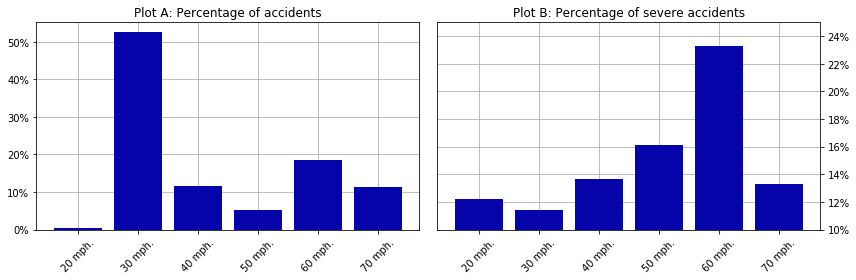

In [257]:
#Collecting the plots in one figure:
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
#Figure 1:
ax3.bar(x_, y, color='#0504aa', zorder=3)
ax3.set_xticklabels(x33, rotation=45)
ax3.set_title("Plot A: Percentage of accidents")
ax3.grid(True, zorder=0)
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x_) for x_ in vals]) #edit "1" to "2" if more decimals are needed.

#Figure 2: 
ax4.bar(x3_, y3, color='#0504aa', zorder=3)
ax4.set_xticklabels(x33, rotation=45)
ax4.set_title("Plot B: Percentage of severe accidents")
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.set_ylim([0.10, 0.25])
vals = ax4.get_yticks()
ax4.grid(True, zorder=0)
ax4.set_yticklabels(['{:,.0%}'.format(x3_) for x3_ in vals]) #edit "1" to "2" if more decimals are needed.

fig2.tight_layout()
plt.savefig('Speedlimit.png')

### Plot: Accidents by Gender:

In [114]:
#Loop for all accidents per gender:
gender_1 = []
fatal_accident_per_gender_1 = []
for i in range(1,3):
    gender_1.append(i)
    fatal_accident_per_gender_1.append(len(joined[(joined['Sex_of_Driver'] == i)]))
    
total_1 = sum(fatal_accident_per_gender_1)
percentage_1 = np.array(fatal_accident_per_gender_1) / total_1

#Label for plot
x5 = ['Male', 'Female']

#Loop for fatal and serious accidents per gender relative to total number of accidents:
gender_2 = []
fatal_accident_per_gender_2 = []
for i in range(1,3):
    gender_2.append(i)
    fatal_accident_per_gender_2.append(len(joined[(joined['Sex_of_Driver'] == i) & (joined['Accident_Severity'] == 1)]))

total_2 = sum(fatal_accident_per_gender_2)
fatal_accident_per_gender_3 = np.array(fatal_accident_per_gender_2)
percentage_2 = fatal_accident_per_gender_3 / total_1

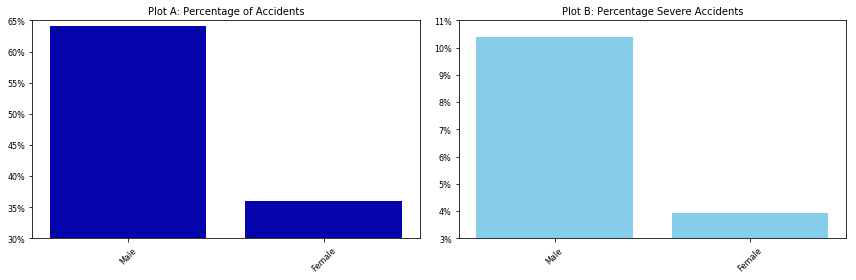

In [265]:
fig4, (ax8, ax9) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax8.bar(x5, percentage_1, color='#0504aa')
ax8.set_xticklabels(x5, rotation=45, size=8)
ax8.set_title("Plot A: Percentage of Accidents", size=10)
ax8.set_ylim([0.30, 0.65])
vals2 = ax8.get_yticks()
ax8.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals2], size=8) #edit "1" to "2" if more decimals are needed.

ax9.bar(x5, percentage_2, color='skyblue')
ax9.set_xticklabels(x5, rotation=45, size=8)
ax9.set_title("Plot B: Percentage Severe Accidents", size=10)
ax9.set_ylim([0.03, 0.11])
vals = ax9.get_yticks()
ax9.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Gender.png')

### Plot: Accidents by Age:

In [105]:
#We will only consider legal drivers, which is at minumum 17 years old in UK: 
age = []
accident_per_age = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age.append(i)
    accident_per_age.append(len(joined[(joined['Age_of_Driver'] == i) ]))
#print(age)
#print(accident_per_age)

#Age relative to serious and fatal accidents:
age2 = []
accident_per_age2 = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age2.append(i)
    accident_per_age2.append(len(joined[(joined['Age_of_Driver'] == i) & (joined['Accident_Severity'] == 1) ]))
#print(age2)
#print(accident_per_age2)

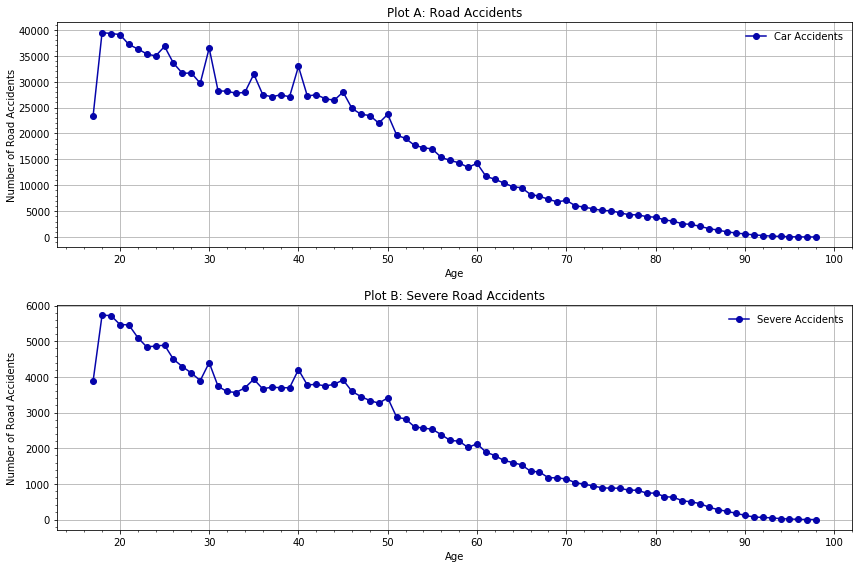

In [262]:
fig3, (ax6, ax7) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

#Figure 1: 
ax6.plot(age, accident_per_age, color='#0504aa', marker = 'o')
ax6.legend(['Car Accidents'],loc='upper right',frameon=False)
ax6.set_title('Plot A: Road Accidents', size=12)
ax6.set_ylabel('Number of Road Accidents', size =10)
ax6.minorticks_on()
ax6.set_xlabel('Age', size =10)
ax6.get_yaxis().set_label_coords(-0.05,0.5)
ax6.grid(True)

#Figure2:
ax7.plot(age2, accident_per_age2, color='#0504aa', marker = 'o')
ax7.legend(['Severe Accidents'],loc='upper right',frameon=False)
ax7.set_title('Plot B: Severe Road Accidents', size=12)
ax7.set_ylabel('Number of Road Accidents', size =10)
ax7.minorticks_on()
ax7.set_xlabel('Age', size =10)
ax7.grid(True)
ax7.get_yaxis().set_label_coords(-0.05,0.5)
fig3.tight_layout()

plt.savefig('AgeCar.png')

### Plot: Accidents by Weather:

In [192]:
#Loop for all accidents per weather condition:
weather = []
accident_per_weather_1 = []
for i in range(1,3):
    weather.append(i)
    accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i)]))
    
total_weather_1 = sum(accident_per_weather_1)
percentage_weather_1 = np.array(accident_per_weather_1) / total_weather_1

#Loop for fatal & serious accident:
weather_2 = []
fatal_accident_per_weather_1 = []
for i in range(1,3):
    weather_2.append(i)
    fatal_accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_weather_2 = sum(fatal_accident_per_weather_1)
percentage_weather_2 = np.array(fatal_accident_per_weather_1) / total_weather_1
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_weather = np.array(fatal_accident_per_weather_1) / np.array(accident_per_weather_1)

#Label for plot
x_weather = ['Dry', 'Rain']

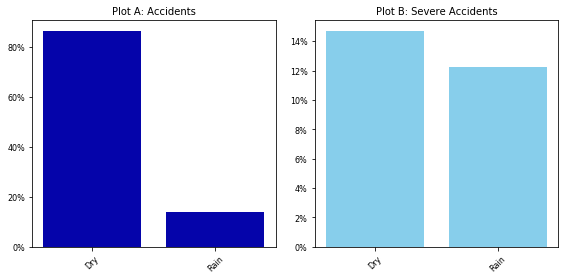

In [263]:
fig4, (ax10, ax11) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax10.bar(x_weather, percentage_weather_1, color='#0504aa')
ax10.set_xticklabels(x_weather, rotation=45, size=8)
ax10.set_title("Plot A: Accidents", size=10)
vals3 = ax11.get_yticks()
ax10.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals3], size=8) #edit "1" to "2" if more decimals are needed.

ax11.bar(x_weather, percentage_weather, color='skyblue')
ax11.set_xticklabels(x_weather, rotation=45, size=8)
ax11.set_title("Plot B: Severe Accidents", size=10)
vals4 = ax11.get_yticks()
ax11.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals4], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Weather.png')

### Plot: Road Condtitions: 

In [135]:
#Loop for all accidents per road condtion:
road_con = []
accident_per_road_con_1 = []
for i in range(1,3):
    road_con.append(i)
    accident_per_road_con_1.append(len(joined[(joined['Road_Surface_Conditions'] == i)]))
    
total_road_1 = sum(accident_per_road_con_1)
percentage_road_1 = np.array(accident_per_road_con_1) / total_road_1

#Loop for fatal & serious accident:
road_2 = []
fatal_accident_per_road_con = []
for i in range(1,3):
    road_2.append(i)
    fatal_accident_per_road_con.append(len(joined[(joined['Road_Surface_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_road_2 = sum(fatal_accident_per_road_con)
percentage_road_2 = np.array(fatal_accident_per_road_con) / total_road_2
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_road = np.array(fatal_accident_per_road_con) / np.array(accident_per_road_con_1)

#Label for plot
x_road = ['Dry Road', 'Wet Road']

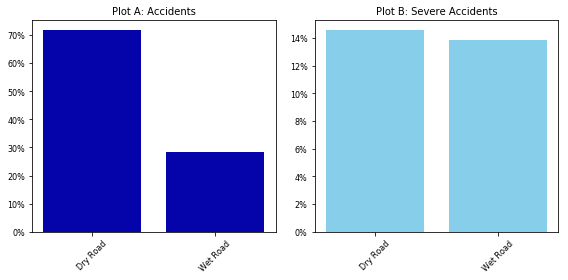

In [264]:
fig5, (ax12, ax13) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax12.bar(x_road, percentage_road_1, color='#0504aa')
ax12.set_xticklabels(x_road, rotation=45, size=8)
ax12.set_title("Plot A: Accidents", size=10)
vals5 = ax12.get_yticks()
ax12.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals5], size=8) #edit "1" to "2" if more decimals are needed.

ax13.bar(x_road, percentage_road, color='skyblue')
ax13.set_xticklabels(x_road, rotation=45, size=8)
ax13.set_title("Plot B: Severe Accidents", size=10)
vals6 = ax13.get_yticks()
ax13.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals6], size=8) #edit "1" to "2" if more decimals are needed.

fig5.tight_layout()
plt.savefig('Road.png')

### Plot: Light Conditions:

In [151]:
#DELETE IF NOT USEFUL, THE PERCENTAGE IS ALMOST IDENTICAL TO WEATHER CONDITION:

#Loop for all accidents per light condtion:
light_con = []
accident_per_road_con_1 = []
for i in range(1,3):
    light_con.append(i)
    accident_per_road_con_1.append(len(joined[(joined['Road_Surface_Conditions'] == i)]))
    
total_road_1 = sum(accident_per_road_con_1)
percentage_road_1 = np.array(accident_per_road_con_1) / total_road_1
print(percentage_road_1)
#Loop for fatal & serious accident:
road_2 = []
fatal_accident_per_road_con = []
for i in range(1,3):
    road_2.append(i)
    fatal_accident_per_road_con.append(len(joined[(joined['Road_Surface_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_road_2 = sum(fatal_accident_per_road_con)
percentage_road_2 = np.array(fatal_accident_per_road_con) / total_road_2
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_road = np.array(fatal_accident_per_road_con) / np.array(accident_per_road_con_1)

#Label for plot
x_light = ['Daylight', 'Dark with lights lit', 'Dark with no light']

[0.71632722 0.28367278]


### Vehicle Age

# Machine Learning

## Unsupervised Learning
- **Clustering**

In [94]:
# Prepare data for ML

joined_cl = joined
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']


joined_X = joined_X.dropna()
joined_X.Hour.unique()

array([ 0.,  1.,  7.,  9.,  8., 10., 13., 14., 18., 16., 19., 20., 17.,
        6., 15., 23., 21.,  2., 12., 11.,  4., 22.,  3.,  5.])

In [98]:
# Clustering - Unscaled
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation

# Changing the 'joined' dataset to array
joined_cl = joined
joined_cl = joined_cl.dropna()
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']

X = joined_X.values
y = joined_y.values


# KMeans
clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))
print(X)

0.638239780331308
[[ 1.  2. 36. ...  1.  1.  0.]
 [ 1.  1. 24. ...  1.  1.  1.]
 [ 1.  1. 20. ...  1.  1.  7.]
 ...
 [ 1.  1. 67. ...  2.  3. 15.]
 [ 1.  1. 27. ...  2.  2.  6.]
 [ 2.  1. 79. ...  2.  2. 15.]]


In [96]:
# Clustering - Unscaled
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation

# Changing the 'joined' dataset to array
joined_cl = joined
joined_cl = joined_cl.dropna()
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']

X = joined_X.values
X = preprocessing.scale(X)
y = joined_y.values


# KMeans
clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))
print(X)

0.6506730756427839


[[-0.75109046  1.33539583 -0.20877322 ... -0.62928851 -0.53817925
  -2.78313666]
 [-0.75109046 -0.74884164 -0.94754326 ... -0.62928851 -0.53817925
  -2.58060476]
 [-0.75109046 -0.74884164 -1.19379995 ... -0.62928851 -0.53817925
  -1.36541335]
 ...
 [-0.75109046 -0.74884164  1.69971608 ...  1.58909624  1.50572728
   0.25484186]
 [-0.75109046 -0.74884164 -0.76285075 ...  1.58909624  0.48377401
  -1.56794525]
 [ 0.58790548 -0.74884164  2.43848613 ...  1.58909624  0.48377401
   0.25484186]]


## Supervised Learning


In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Changing the 'joined' dataset to array
joined_cl = joined
joined_cl = joined_cl.dropna()
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']

X = joined_X.values
X = preprocessing.scale(X)
y = joined_y.values

# Configuration for cross validation test
seed = 7
# Preparation of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.856720 (0.003909)
LDA: 0.856678 (0.003987)
